# Project: Write A Data Science Blog Post 

In this project, I will creating a jupyter notebook, blog post and Github repository to start building my data science portfolio. This data science process focus on the `Stack Overflow data - 2017 survey data`. The analysis will be completed by using CRISP-DM (Cross Industry Process for Data Mining), as presented at below.

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

In [1]:
# import all libraries

# for data wrangling
import numpy as np
import pandas as pd

# for modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# others
from collections import defaultdict

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


## 1 Business Understanding

In the first steps, we could consider the following as our business understanding.

1. What is the most used programming language in 2017?
2. What are the employment status and enjoyability (ProgramHobby) of those who have programming skillsets?
3. How well can we predict an individual's enjoyability (ProgramHobby)? What aspects correlate well to enjoyability (ProgramHobby)?

## 2 Data Understanding

In order to answering the question above, we will preform data science process on Stackoverflow survey data (in 2017) to get some insight into each of these questions. Below presents the column needed for analysis/modelling prediction of each questions:

1. Is Python the most used programming language in 2017?
      - HaveWorkedLanguage
2. What are the employment status and enjoyability (ProgramHobby) of those who have programming skillsets?
      - EmploymentStatus, ProgramHobby 
3. How well can we predict an individual's enjoyability (ProgramHobby)? What aspects correlate well to enjoyability (ProgramHobby)?
      - All columns

### 2.1 Question 1: What is the most used programming language in 2017?

In [2]:
# loading data
df = pd.read_csv('data/survey_results_public.csv')

In [3]:
# function for calculating programming languages in `HaveWorkedLanguage` column
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


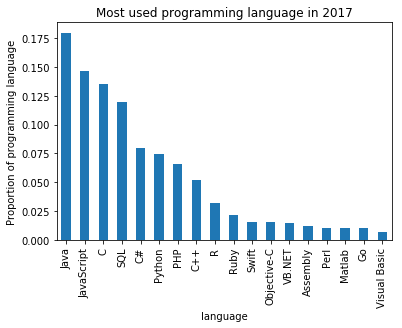

In [4]:
# list out all the most popular programming languages
pg_popular = ['Java', 'C', 'Python', 'C++', 'VB.NET', 'C#', 'JavaScript', 'PHP', 'SQL', 'Objective-C', 'Assembly', 'Matlab', 'Swift', 'Go', 'R', 'Ruby', 'Perl', 'Visual Basic']

# counts each 'HaveWorkedLanguage'
pg = df['HaveWorkedLanguage'].value_counts().reset_index()

# rename its column name
pg.rename(columns={'index': 'language', 'HaveWorkedLanguage': 'count'}, inplace=True)

# counting each popular programming languages from 'pg'
pg_df = total_count(pg, 'language', 'count', pg_popular)

# rename index  as 'language'
pg_df.set_index('language', inplace=True)

# calculating the proportion of each programming languages
pg_df_prop = (pg_df/pg_df.sum()) 

# plotting the chart
pg_df_prop.plot(kind='bar', legend=None);
plt.title('Most used programming language in 2017')
plt.ylabel('Proportion of programming language')
plt.show()

> From the chart above, Java is the most used programming language in 2017 

### 2.2 Question 2: What are the employment status and enjoyability (ProgramHobby) of those who have programming skillsets?

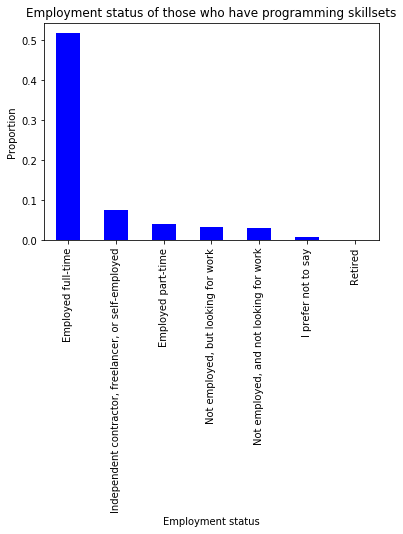

In [5]:
# create df for those datasets with have worked language
df_have_worked_Lang = df.query('HaveWorkedLanguage.isnull() == False')

# calculate the proportion of each employment status and plot the bar chart
result = df_have_worked_Lang.EmploymentStatus.value_counts()/df.shape[0]
result.plot(kind = 'bar', color = 'b')
plt.title('Employment status of those who have programming skillsets')
plt.ylabel('Proportion')
plt.xlabel('Employment status');

In [6]:
result

Employed full-time                                      0.518135
Independent contractor, freelancer, or self-employed    0.076296
Employed part-time                                      0.041835
Not employed, but looking for work                      0.033682
Not employed, and not looking for work                  0.031639
I prefer not to say                                     0.009243
Retired                                                 0.001829
Name: EmploymentStatus, dtype: float64

From the outputs above, we could notice that the proportion of Employed full-time is higher than another employment status if the person who have programming language skillsets.

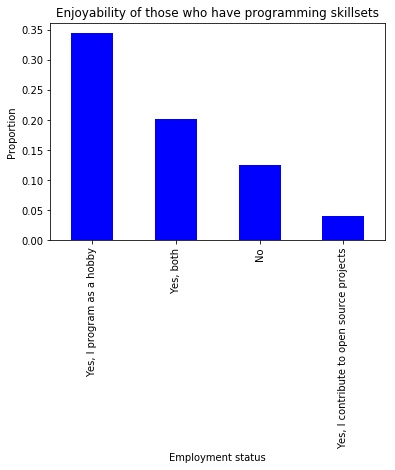

In [7]:
# create df for those datasets with have worked language
df_have_worked_Lang = df.query('HaveWorkedLanguage.isnull() == False')

# calculate the proportion of each enjoyability and plot the bar chart
result = df_have_worked_Lang.ProgramHobby.value_counts()/df.shape[0]
result.plot(kind = 'bar', color = 'b')
plt.title('Enjoyability of those who have programming skillsets')
plt.ylabel('Proportion')
plt.xlabel('Employment status');

Chart above presents a majority of programmer enjoy their programming works, especially program as hobby, followed by program for both (hobby & contribute to open source projects) and program to contribute to open source projects only. 

## 3 Data Preparation

### 3.1 Gather

In [8]:
# loading data
df = pd.read_csv('data/survey_results_public.csv')

### 3.2 Access

#### 3.2.1 Visual Assessment

In [9]:
df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.000000
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.000000,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


#### 3.2.2 Programmatic Assessment

In [10]:
# using .info() for df
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
Respondent                          51392 non-null int64
Professional                        51392 non-null object
ProgramHobby                        51392 non-null object
Country                             51392 non-null object
University                          51392 non-null object
EmploymentStatus                    51392 non-null object
FormalEducation                     51392 non-null object
MajorUndergrad                      42841 non-null object
HomeRemote                          44008 non-null object
CompanySize                         38922 non-null object
CompanyType                         38823 non-null object
YearsProgram                        51145 non-null object
YearsCodedJob                       40890 non-null object
YearsCodedJobPast                   974 non-null object
DeveloperType                       36125 non-null object
WebDeveloperType       

In [11]:
# calculate the number of features which have missing data
len(df.isnull().sum())

154

> Total number of features that have missing data is 154.
>
> Respondent should be object/string instead of integer.

In [12]:
# assessing stastistic of df
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


> From here, the dataset consists of 7 quantitative and 147 (154-7) qualitative features.

In [13]:
# 5 random samplings of df 
df.sample(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
39570,39571,Professional developer,"Yes, I program as a hobby",Germany,No,Employed full-time,Secondary school,NaN,Never,Fewer than 10 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22355,22356,Professional developer,"Yes, I program as a hobby",Czech Republic,No,"Independent contractor, freelancer, or self-em...",Master's degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),NaN,...,NaN,Male,A master's degree,White or of European descent,Strongly agree,Agree,Disagree,Agree,NaN,NaN
38998,38999,Student,"Yes, both",India,"Yes, full-time",Employed part-time,Secondary school,NaN,"More than half, but not all, the time",I prefer not to answer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16651,16652,Professional developer,"Yes, both",China,No,"Not employed, but looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Female,I don't know/not sure,East Asian; South Asian,Disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN
24281,24282,Professional developer,"Yes, I contribute to open source projects",United States,"Yes, full-time",Employed full-time,Doctoral degree,Computer programming or Web development,All or almost all the time (I'm full-time remote),"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Random check our dataset (df).

In [14]:
# check if there is duplicated data (row) at df
df.duplicated().sum()

0

In [15]:
# check if there is duplicated Respondent at df
df.Respondent.value_counts()

2047     1
14994    1
19100    1
29339    1
31386    1
25241    1
27288    1
4759     1
6806     1
661      1
2708     1
12947    1
8849     1
23006    1
10896    1
49805    1
37511    1
39558    1
33413    1
35460    1
45699    1
47746    1
41601    1
43648    1
17053    1
23198    1
21151    1
43712    1
19164    1
29403    1
        ..
29988    1
19747    1
17698    1
23841    1
48445    1
44351    1
48509    1
21856    1
46460    1
36219    1
34170    1
40313    1
38264    1
50546    1
11631    1
9582     1
15725    1
13676    1
3435     1
1386     1
7529     1
5480     1
28007    1
25958    1
32101    1
30052    1
19811    1
17762    1
23905    1
2049     1
Name: Respondent, Length: 51392, dtype: int64

> No duplicated dataset at the datasets

#### Quality

- 154 features (7 numberic and 147 categorical) that have missing data.
- Respondent are not useful for our modelling prediction
- Categorical variables exist in our dataset (Need one-hot encoding). Besides that, our target labels are also categorical variable


### 3.3 Clean

Before cleaning,  I will split data into features and target label (ProgramHobby).

The following steps are used for the cleaning works:

1. Address missing data
2. Cleaning for quality

Each cleaning processes consists of Define, Code, Test sections

In [16]:
# Split the data into features and target label
program_hobby_raw = df['ProgramHobby']
features_raw = df.drop('ProgramHobby', axis = 1)

#### 3.3.1 Missing Data

#### <font color=blue>154 features (7 numberic and 147 categorical) that have missing data.</font>

`Define`


The following are steps of handling all missing data:
1. Access missing data in each column and drop columns that have higher missing value proportion (more than 10% of datasets)
2. Access missing data in each row and dummy all categorical column with dummy_na = True.

`Code`


##### 3.3.1.1 Access missing data in each column

In [17]:
# check if there is any missing data in our target label (ProgrammHobby)
program_hobby_raw.isnull().sum()

0

In [18]:
# count missing data for each column and define it as data_missing_count
data_missing_count = features_raw.isnull().sum()
data_missing_count

Respondent                         0
Professional                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  8551
HomeRemote                      7384
CompanySize                    12470
CompanyType                    12569
YearsProgram                     247
YearsCodedJob                  10502
YearsCodedJobPast              50418
DeveloperType                  15267
WebDeveloperType               40696
MobileDeveloperType            49839
NonDeveloperType               46502
CareerSatisfaction              8697
JobSatisfaction                11016
ExCoderReturn                  50469
ExCoderNotForMe                50471
ExCoderBalance                 50469
ExCoder10Years                 50475
ExCoderBelonged                50464
ExCoderSkills                  50457
ExCoderWillNotCode             50470
ExCoderActive                  50462
P

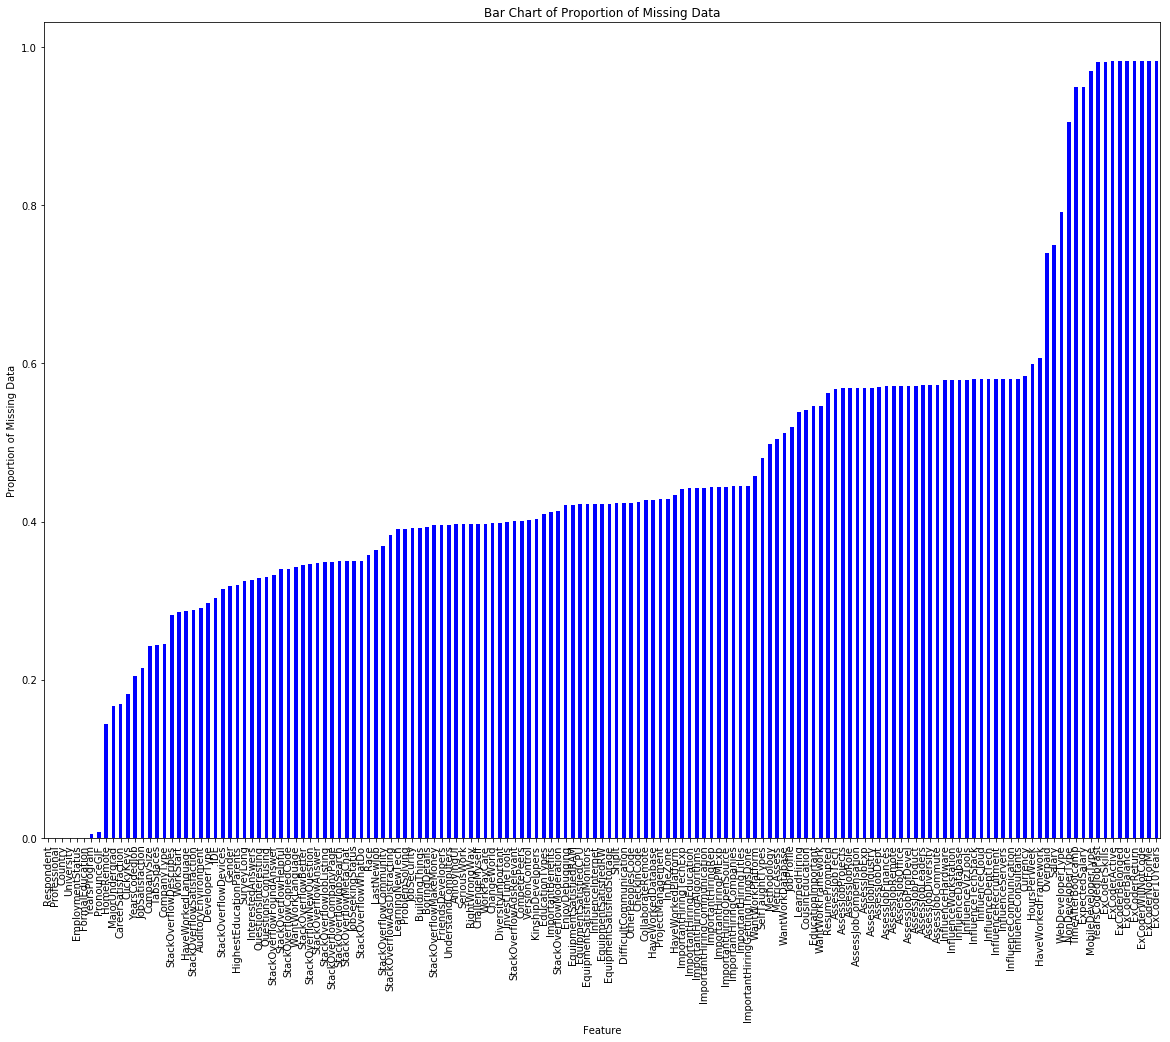

In [19]:
# sort the data_missing_count
data_missing_count = data_missing_count.sort_values()

# calculate the proportion of data missing count
data_missing_prop = data_missing_count/features_raw.shape[0]

# plot bar chart for data_missing_prop 
data_missing_prop.plot.bar(figsize=(20,15), color = 'b')

# add title, x-label and y-label into plot
plt.title('Bar Chart of Proportion of Missing Data')
plt.xlabel('Feature')
plt.ylabel('Proportion of Missing Data');

> Although the chart above is unable to present the features that have higher missing data clearly, we still could notice that there are some features that have more than 10 % of missing data.
>
>Let's zoom it for features that have more than 10% of datasets.

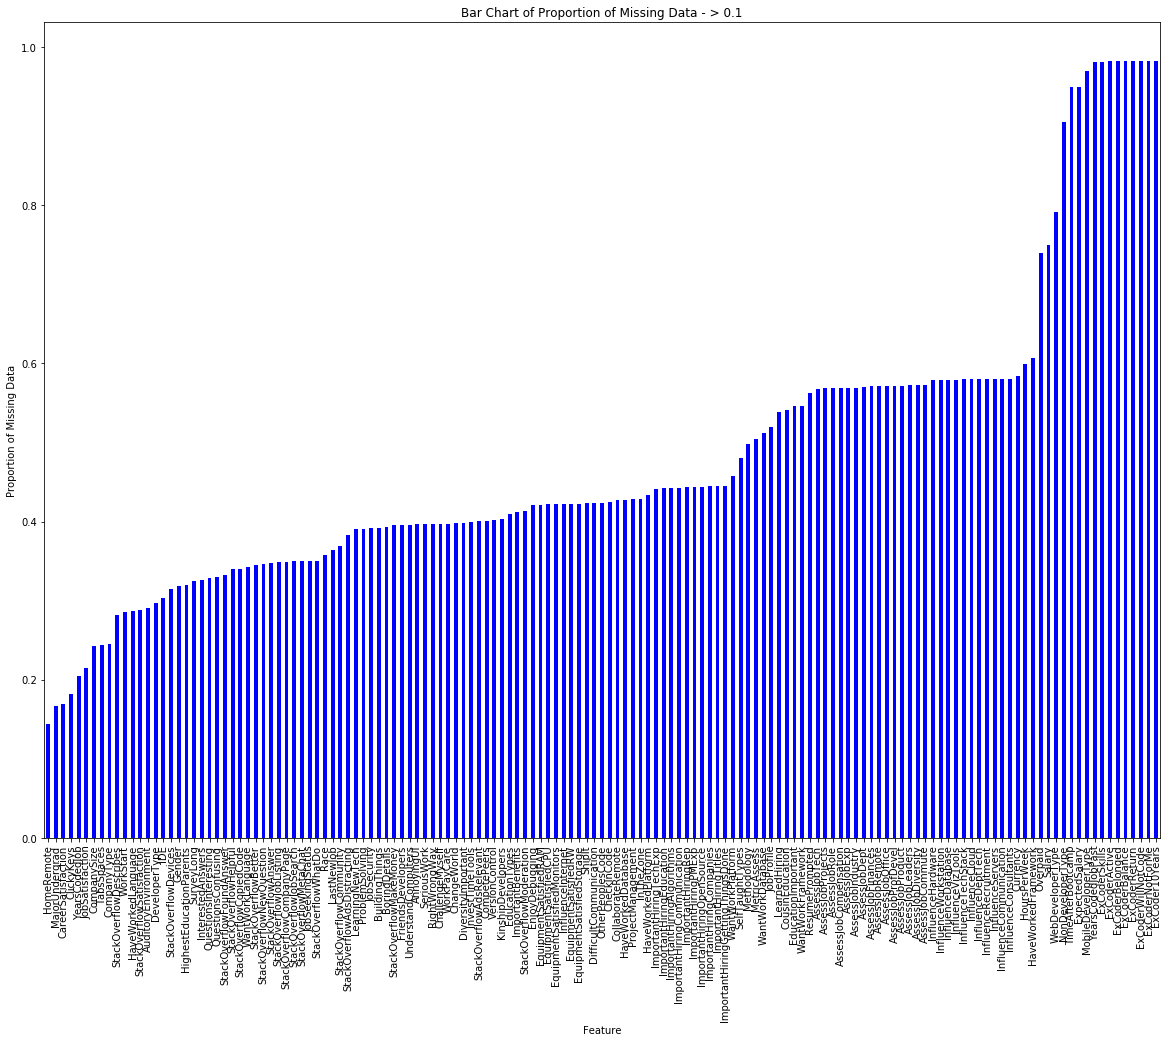

In [20]:
# plotting for data_missing_count_prop which more than 0.1 of datasets (row)

# define higher missing data features as 'data_missing_prop_high'
data_missing_prop_high = data_missing_prop[data_missing_prop>0.1] 

# plot bar chart for `data_missing_prop_high`
data_missing_prop_high.plot.bar(figsize=(20,15), color = 'b')

# add title, x-label and y-label into plot
plt.title('Bar Chart of Proportion of Missing Data - > 0.1')
plt.xlabel('Feature')
plt.ylabel('Proportion of Missing Data');

In [21]:
# calculate number of features that have higher missing data proportion.
print(len(data_missing_prop_high))

# print out all features that have more than 10% of missing data
data_missing_prop_high

145


HomeRemote                   0.143680
MajorUndergrad               0.166388
CareerSatisfaction           0.169229
ClickyKeys                   0.181857
YearsCodedJob                0.204351
JobSatisfaction              0.214352
CompanySize                  0.242645
TabsSpaces                   0.244026
CompanyType                  0.244571
StackOverflowDescribes       0.281367
WorkStart                    0.285959
HaveWorkedLanguage           0.287340
StackOverflowSatisfaction    0.287983
AuditoryEnvironment          0.290609
DeveloperType                0.297070
IDE                          0.302810
StackOverflowDevices         0.315010
Gender                       0.318046
HighestEducationParents      0.320167
SurveyLong                   0.324408
InterestedAnswers            0.326510
QuestionsInteresting         0.327989
QuestionsConfusing           0.330265
StackOverflowFoundAnswer     0.332776
StackOverflowHelpful         0.339469
StackOverflowCopiedCode      0.340189
WantWorkLang

>  The 145 Features above have higher missing value proportion (more than 10% of datasets), Therefore, let's drop these 145 features from our datasets as below. 

In [22]:
# drop features (which have higher missing values) from our dataset
features = features_raw.drop(data_missing_prop_high.index, axis=1)

##### 3.3.1.2 Access missing data in each row

> For categorical variables, we could dummy them with set "dummy_na=True"

In [23]:
# Dummy the categorical variables by using panda's get_dummies() with set "dummy_na=True"
features = pd.get_dummies(features, dummy_na=True)

`Test`


In [24]:
# Check if there is missing data
features.isnull().sum().sum()

0

#### 3.3.2 Quality

#### <font color=blue>Respondent are not useful for our modelling prediction</font>

`define`

The respondent was dropped from the dataset by using `drop()` method

`code`

In [25]:
# let's remove "Respondent" from our features datasets
features = features.drop(['Respondent'], axis=1)

`test`

In [26]:
# check the datatype of respondent series
'Respondent' in features.columns

False

#### <font color=blue>Categorical variables exist in our dataset (Need one-hot encoding). Besides that, our target labels are also categorical variable
</font>

`define`

No need to carry out one-hot encoding for all features that had been encode at previous section (Handling Missing Data). Convert the target label 'ProgramHobby' to numerical entries (0 if 'No' and '1' if 'Yes').

`code`

In [27]:
# all features had been encoded by one-hot encoding at previous section.

# Encode our target label (ProgramHobby) data to numerical values
program_hobby = program_hobby_raw.apply(lambda x: 0 if x == "No" else 1)


`test`

In [28]:
# check if the encoding is successful
program_hobby.value_counts()

1    41605
0     9787
Name: ProgramHobby, dtype: int64

## 4 Model 

This section is for answering Question 3: How well can we predict an individual's enjoyability (ProgramHobby)?

In [29]:
print(features.shape)
print(program_hobby.shape)

(51392, 258)
(51392,)


> The output above shows that the row number of features and program_hobby are 51,392 rows, which is too much for our machine learning model. The machine learning algorithms will be unable to optimize for a solution at all. 
> Therefore, we need to find out the optimal row number needed for our model prediction. The optimal row number could be obtained by using each model's F1 and Accuracy scores.

### 4.1 Optimization

In [30]:
# create function for split data (to test and train data) and run Random Forest model
def split_and_model(num_row):
    '''
    INPUT
    num_row - the number of row needed for models 

    OUTPUT
    rf_preds - list of predicted y by using X_test
    random_search - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    # Split the 'features' and 'ProgramHobby' data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features.iloc[0:num_row,:], 
                                                        program_hobby.iloc[0:num_row], 
                                                        test_size = 0.3, 
                                                        random_state = 42)
    # build a classifier
    clf_rf = RandomForestClassifier()

    # Set up the hyperparameter search
    param_dist = {"max_depth": [3, None],
                  "n_estimators": list(range(10, 200)),
                  "max_features": list(range(1, X_test.shape[1]+1)),
                  "min_samples_split": list(range(2, 11)),
                  "min_samples_leaf": list(range(1, 11)),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}


    # Run a randomized search over the hyperparameters
    random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

    # Fit the model on the training data
    random_search.fit(X_train, y_train)

    # Make predictions on the test data
    rf_preds = random_search.best_estimator_.predict(X_test)
    
    # return model results
    return random_search, rf_preds, X_train, X_test, y_train, y_test
    

In [31]:
# try for the following row number, from 500 to 10000
num_rows = [10000, 6000, 5000, 3000, 1000, 500]

# create empty list for accuracy and F1 scores
accuracy_score_list = []
f1_score_list = []

# Loop for each row number
for num_row in num_rows:
    
    # running model    
    random_search, rf_preds, X_train, X_test, y_train, y_test = split_and_model(num_row)
    
    # appending all accuracy and F1 scores into their respective list    
    accuracy_score_list.append(accuracy_score(y_test, rf_preds))
    f1_score_list.append(f1_score(y_test, rf_preds))


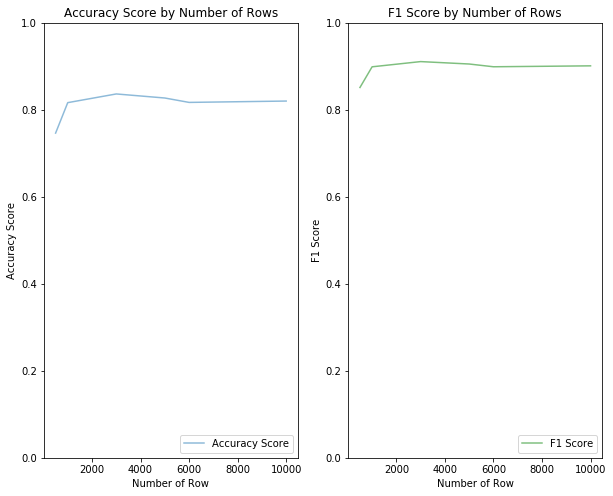

In [32]:
# Plotting the score results
fig = plt.figure(figsize=(10, 8))

# for Accuracy Score
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(num_rows, accuracy_score_list, label="Accuracy Score", alpha=.5)
plt.xlabel('Number of Row')
plt.ylabel('Accuracy Score')
plt.ylim((0,1))
plt.title('Accuracy Score by Number of Rows')
plt.legend(loc=4)

# for F1 Score
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(num_rows, f1_score_list, label="F1 Score", alpha=.5, color = 'g')
plt.xlabel('Number of Row')
plt.ylabel('F1 Score')
plt.ylim((0,1))
plt.title('F1 Score by Number of Rows')
plt.legend(loc=4);


> Both plot above show that F1 and Accuracy scores of model running will became constant after 3000 row number onward. Therefore, let's run our model by using 3000 row (optimal value).  

### 4.2 Running modelling by using the optimal row number

In [33]:
# running model by 3000 rows (optimal value)
random_search, rf_preds, X_train, X_test, y_train, y_test = split_and_model(3000)

## 5 Evaluate the Results

### 5.1 Model Evaluation Metrics

In [34]:
# print the score
print('Accuracy score: {0:5.2f}'.format(accuracy_score(y_test, rf_preds)))
print('Precision score: {0:5.2f}'.format(precision_score(y_test, rf_preds)))
print('Recall score:  {0:5.2f}'.format(recall_score(y_test, rf_preds)))
print('F1 score: {0:5.2f}'.format(f1_score(y_test, rf_preds)))

Accuracy score:  0.84
Precision score:  0.84
Recall score:   1.00
F1 score:  0.91


> The Accuracy and F1 score of the modelling are 0.84 and 0.91 respectively. 
>
> With the best model above, it is also important to understand why it is performing well. In regression models where we can see the weights, it can be much easier to interpret results. Next, let's extract the top 10 feature importances from our model above.

### 5.2 Extracting Feature Importance

This section is for answering Question 3: What aspects correlate well to enjoyability?

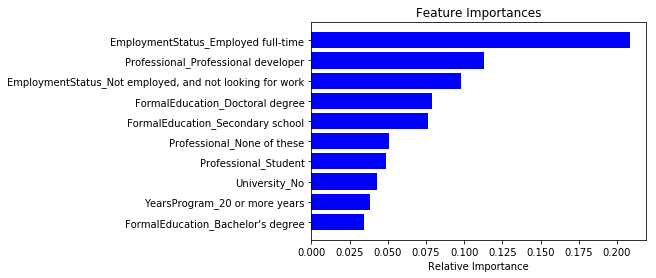

In [35]:
# Define 
features_column = features.columns[:features.shape[1]]
importances = random_search.best_estimator_.feature_importances_
indices = np.argsort(importances)### 5.1 Model Evaluation Metrics

# Plotting the horinzontal bar chart
plt.barh(range(len(indices[248:258])), importances[indices[248:258]], color='b', align='center')
plt.title('Feature Importances')
plt.yticks(range(len(indices[248:258])), features_column[indices[248:258]])
plt.xlabel('Relative Importance');


> According to chart above, we could make the following conclusions:
>
>- Employment Status appears to be one of the top indicators for an individual enjoyability.
>- Professional Status and Formal Education are another important indicators for the enjoyability of programmer.


## 6 Deploy

Communication is such an important part of the role of a data scientist. Therefore, I will share my insights above with stakeholders by using the following components:

1. A Github repository for my code and data wrangling/modeling techniques, with a technical audience in mind. [Here](https://github.com/leehongchen1985/Project-Write-A-Data-Science-Blog-Post)
2. A blog post of my questions and insights with a non-technical audience. [Here](https://medium.com/@leehongchen/what-is-the-most-used-programming-language-in-2017-d3f5840b9f63)